# BP with decimation

In [15]:
using OffsetArrays, Statistics
include("../code/bp.jl")
include("../code/slim_graphs.jl")

findbasis_slow (generic function with 1 method)

In [25]:
m = factorial(5)*11*4
R = 0.8/3
r = 1 - 3R
n = round(Int, 3m/(2+r))
Λ = OffsetVector([0,0,1-r,r], 0:3)
K = OffsetVector([0,0,0,1], 0:3)
nedges = 3m
Hs = 10.0 .^ (-0.7:0.25:-0.2)
navg = 300
dist_f3 = [Float64[] for _ in eachindex(Hs)]
for j in 1:navg
    println("#### Round $j of $navg")
    bp = belief_propagation(n, m, nedges, Λ, K)
    B, freevars = findbasis_slow(permutedims(Array(bp.H)))
    s = rand((-1,1), n)
    for (i,H) in enumerate(Hs)
        println("------ H=", round(H,digits=4), ". ", i, " of ", length(Hs), " ------")
        fields = tanh.(H*copy(s))
        _,_,d = decimate!(bp, fields, freevars, maxiter=1000, Tmax=1, tol=1e-12) 
        isnan(d) || push!(dist_f3[i], d) 
    end
end

#### Round 1 of 10
------ H=0.1995. 1 of 3 ------
Trial 1 of 1: 0 unsat
------ H=0.3548. 2 of 3 ------
Trial 1 of 1: contradiction found. 4 unsat
------ H=0.631. 3 of 3 ------
Trial 1 of 1: contradiction found. 14 unsat
#### Round 2 of 10
------ H=0.1995. 1 of 3 ------
Trial 1 of 1: 0 unsat
------ H=0.3548. 2 of 3 ------
Trial 1 of 1: 0 unsat
------ H=0.631. 3 of 3 ------
Trial 1 of 1: contradiction found. 10 unsat
#### Round 3 of 10
------ H=0.1995. 1 of 3 ------
Trial 1 of 1: 0 unsat
------ H=0.3548. 2 of 3 ------
Trial 1 of 1: contradiction found. 5 unsat
------ H=0.631. 3 of 3 ------
Trial 1 of 1: contradiction found. 4 unsat
#### Round 4 of 10
------ H=0.1995. 1 of 3 ------
Trial 1 of 1: 0 unsat
------ H=0.3548. 2 of 3 ------
Trial 1 of 1: 1 unsat
------ H=0.631. 3 of 3 ------
Trial 1 of 1: contradiction found. 40 unsat
#### Round 5 of 10
------ H=0.1995. 1 of 3 ------
Trial 1 of 1: 0 unsat
------ H=0.3548. 2 of 3 ------
Trial 1 of 1: 0 unsat
------ H=0.631. 3 of 3 ------
Trial 1 

Avg over 10 instances


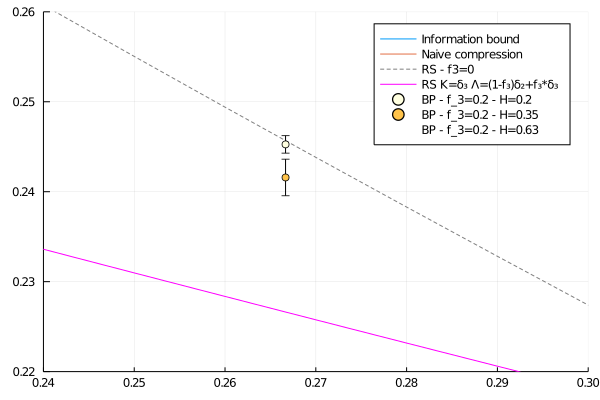

In [26]:
println("Avg over $navg instances")
colors = cgrad(:heat, length(Hs)+1, categorical = true)
pl_f3 = plot_rdb()
for (i,H) in enumerate(Hs)
    scatter!(pl_f3, [R], [mean(dist_f3[i])], 
        yerr = [std(dist_f3[i])/sqrt(length(dist_f3[i]))],
        label="BP - f_3=$(round(r,digits=1)) - H=$(round(H,sigdigits=2))", mc=colors[i], ms=4)
end
plot(pl_f3, size=(600,400), legend=:topright)
xlims!((0.24,0.30)); ylims!((0.22,0.26))